In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
import pymc3

In [4]:
import theano.tensor as tht
import numpy as np

In [5]:
N, d = iris['data'].shape # N: number of data points, d: dimension
k = 3 # number of clusters
model = pymc3.Model() # our model
with model:
    # cluster means
    means = pymc3.Normal('means', mu=[np.zeros(d)]*k, shape=(k,d))
    # probability of each cluster
    p = pymc3.Dirichlet('p', a=np.array([1.]*k), shape=(k,))
    # making sure each cluster contains at least 10% of the points
    #p_min_potential = pymc3.Potential('p_min_potential', tht.switch(tht.min(p) < .1, -np.inf, 0))
    # cluster label for each point
    category = pymc3.Categorical('category', p=p, shape=N)
    # the observations come in here
    points = pymc3.MvNormal('obs',
                       mu=means[category],
                       tau=np.eye(d),
                       observed=iris['data'])

In [18]:
with model:
    #step1 = pymc3.Metropolis(vars=[p, means])
    # pymc complains that the following is deprecated
    #step2 = pymc3.ElemwiseCategorical(vars=[category], values=list(range(k)))
    # This is the currently accept 
    #step2 = pymc3.CategoricalGibbsMetropolis(vars=[category])
    step = pymc3.NUTS()
    tr = pymc3.sample(10000, step=[step])

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [p, means]
>CategoricalGibbsMetropolis: [category]
Sampling 2 chains: 100%|██████████| 21000/21000 [06:12<00:00, 56.36draws/s]
There were 8522 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.06544332100818241, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e0d35c7b8>,
      dtype=object)

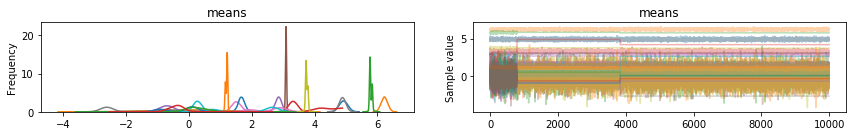

In [19]:
pymc3.plots.traceplot(tr, ['means'])

In [20]:
# Show the cluster assignment in the very last sample
tr['category'][-1]

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
tr['means'][700]

array([[ 5.00187109,  3.27548653,  1.29543619,  0.11413142],
       [ 6.11216371,  2.78327576,  4.7563726 ,  1.71778887],
       [-0.68957043,  0.47287487,  0.02753137,  0.55383776]])

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

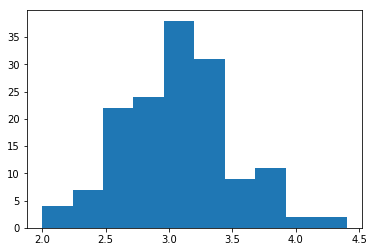

In [43]:
import matplotlib.pyplot as plt
plt.hist(iris['data'][:,1])
# At least two clusters should be visible
# Compare with https://commons.wikimedia.org/wiki/File:Iris_Flowers_Clustering_kMeans.svg


In [17]:
# Typically, we'd expect the clustering category to be the same as the target
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])